In [1]:
import pandas as pd
import numpy as np 
import scipy

import itertools
from scipy.optimize import fsolve

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import re

import warnings
warnings.filterwarnings('ignore')

# Урок 3

### Задание 1 


#### Нарисуйте график функции:
#### y(x) = k∙cos(x – a) + b
#### для некоторых (2-3 различных) значений параметров k, a, b


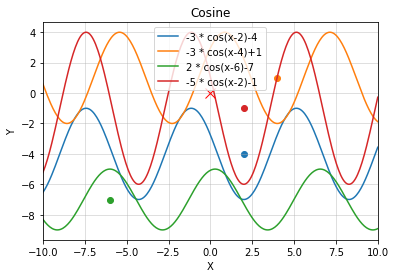

In [2]:
# cos
x = np.linspace(-10, 10, 300)

for i in range (4):
    k, a, b = np.random.randint(-7,7, size=(1, 3))[0]
    y = k * np.cos(x - a) + b
    plt.plot(x, y , linewidth = 1.5,
             label = f"{k} * cos(x{'-'*(a>0)}{str(a)*(a!=0)}){'+'*(b>0 and b!= 0)}{str(b)*(b!=0)}")
    plt.scatter(a,b)

plt.legend()
plt.grid(alpha = 0.5)
plt.plot(0, 0,marker='x', markersize=10, color="red")
plt.title("Cosine")
plt.xlim(-10,10)
plt.xlabel("X")
plt.ylabel("Y");

### Задание 2

#### Докажите, что при ортогональном преобразовании сохраняется расстояние между точками.

In [3]:
#...

### Задание 3 

#### Напишите код, который будет переводить полярные координаты в декартовы.

In [4]:
def dec2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, rad)

def pol2dec(rho, rad):
    x = rho * np.cos(rad)
    y = rho * np.sin(rad)
    return(x, y)

#### Напишите код, который будет рисовать график окружности в полярных координатах.

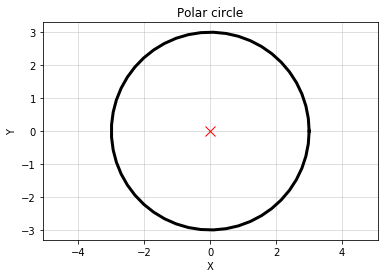

In [5]:
R = 3
rad = np.linspace(0, 2*np.pi, 50)
plt.plot(*pol2dec(R, rad), linewidth = 3, color = "black")
plt.plot(0,0,marker='x', markersize=10, color="red")
plt.axis('equal')
plt.grid(alpha = 0.5)
plt.title("Polar circle")
plt.xlabel("X")
plt.ylabel("Y");


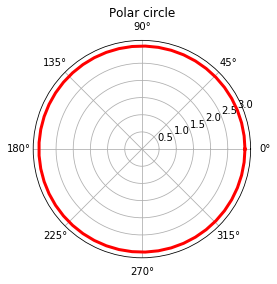

In [6]:
plt.polar(rad, np.array([R] * len(rad)), linewidth = 3, color = "red")
plt.title("Polar circle",y=1.08);

### Задание 4

#### Решите систему уравнений:
#### y = x2 – 1
#### exp(x) + x∙(1 – y) = 1


Equations roots:
 [[ 4.20011 16.64089]
 [ 2.61815  5.85469]
 [-1.58184  1.5022 ]
 [ 0.      -1.     ]]


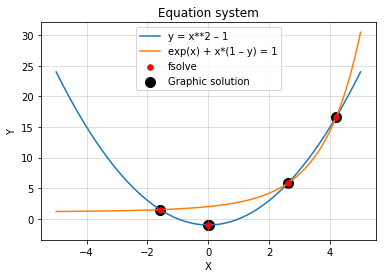

In [7]:
def f(vars1):
    x,y = vars1
    return [y - x**2 + 1, np.exp(x) + x - x*y - 1] 

x = np.linspace(-5,5,500)
y1 = x**2-1
y2 = (np.exp(x)+x-1)/x  
plt.plot(x,y1,label = "y = x**2 – 1")
plt.plot(x,y2, label = "exp(x) + x*(1 – y) = 1")

k = np.array([fsolve(f,i)  for i in [[10,50],[2, 5],[-10, 8], [-1,-1]] ]).T
plt.scatter(k[0],k[1], label = "fsolve", c = "red",zorder = 10,s = 30)

plt.scatter(x[ np.round(np.exp(x) + x*(1-y1),1) == 1],y1[ np.round(np.exp(x) + x*(1-y1),1) == 1],
            label = "Graphic solution",color = "black",zorder = 1, s = 100)
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Equation system")
plt.grid(alpha = 0.5);
print("Equations roots:\n",np.round(k,5).T)

#### Решите систему уравнений и неравенств:

#### y = x2 – 1
#### exp(x) + x∙(1 – y) > 1

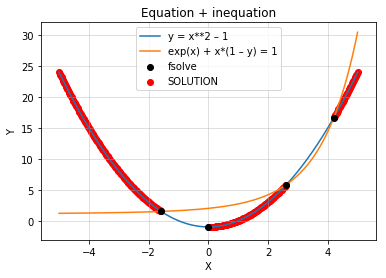

In [8]:
def f(vars1):
    x,y = vars1
    return [y - x**2 + 1, np.exp(x) + x - x*y - 1] 

x = np.linspace(-5,5,500)
y1 = x**2-1
y2 = (np.exp(x)+x-1)/x

plt.plot(x,y1,label = "y = x**2 – 1")
plt.plot(x,y2, label = "exp(x) + x*(1 – y) = 1")
k = np.array([fsolve(f,i)  for i in [[3,5],[4,15],[-2,5],[0,-1]] ]).T
plt.scatter(k[0],k[1], label = "fsolve", color = "black",zorder = 10)

plt.scatter(x[ np.exp(x) + x*(1-y1) > 1],y1[ np.exp(x) + x*(1-y1) > 1],
            label = "SOLUTION",color = "red",zorder = 1)


plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Equation + inequation")
plt.grid(alpha = 0.5);

# Урок 4

### Задание 1

##### Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро)

In [9]:
k = []
games = np.linspace(1_000, 1_000_000, 50)
games_prob = [1/37] * len(games)

In [10]:
r = np.random.RandomState(42)
for i in games:
    set_game = r.randint(0, 37, size = np.int64(i))
    zero_wins = len(set_game[set_game == 0])
    k.append(zero_wins)

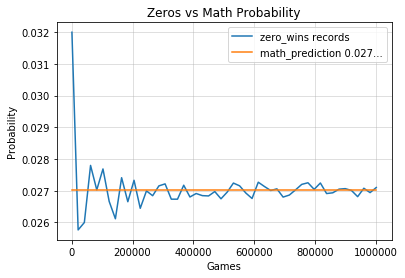

In [11]:
plt.plot(games ,k/games,label = "zero_wins records", )
plt.plot(games , games_prob  ,label = f"math_prediction {np.round(1/37, 3)}...")

plt.legend(loc =1)
plt.xlabel("Games")
plt.ylabel("Probability")
plt.title("Zeros vs Math Probability")
plt.grid(alpha = 0.5);



### Задание 2

##### 1.Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.

In [12]:
# multiplication  checking 
head_coin = 0.5
tail_coin = 0.5
# 3 tails in line  = tail_coin ** 3  = 0.125

In [13]:
games = np.random.rand(99999)>0.5

In [14]:
tot = 0
for i in [0,-1,-2]:
    tot += np.sum(np.sum(np.reshape(np.roll(games,i),(-1,3)), axis = 1 ) == 3)
print(tot/len(games))

0.12463124631246313


##### Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

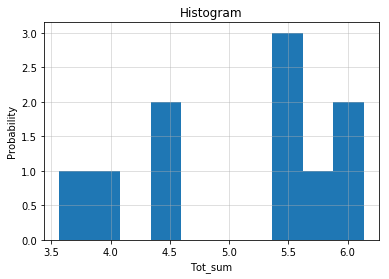

In [15]:
tot_sum = np.sum(np.random.rand(100).reshape((10,-1)),axis = 1)
plt.hist(tot_sum,bins =10)
plt.xlabel("Tot_sum")
plt.ylabel("Probability")
plt.title("Histogram")
plt.grid(alpha = 0.5);


### Задание 3

##### 1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [16]:
n_test = 4
K_succes = 2
N_long = 100_000

coints_test = np.random.randint(0, 2, n_test * N_long).reshape((n_test, -1))
test_sum = np.sum(coints_test,axis = 0)
ans = np.sum(test_sum == K_succes)

math_probab = (scipy.math.factorial(n_test) / (scipy.math.factorial(K_succes)*
               scipy.math.factorial(n_test-K_succes))) * (1/2**n_test)

print(f"Test probability: {ans/N_long}, on {N_long} rep.")
print(f"Math probability by formula: {math_probab}")

Test probability: 0.37513, on 100000 rep.
Math probability by formula: 0.375


##### 2.Повторите расчеты, взяв другие значения n и k.

In [17]:
n_test = 5
K_succes = 3
N_long = 100_000

coints_test = np.random.randint(0, 2, n_test * N_long).reshape((n_test, -1))
test_sum = np.sum(coints_test,axis = 0)
ans = np.sum(test_sum == K_succes)

math_probab = (scipy.math.factorial(n_test) / (scipy.math.factorial(K_succes)*
               scipy.math.factorial(n_test-K_succes))) * (1/2**n_test)

print(f"Test probability: {ans/N_long}, on {N_long} rep.")
print(f"Math probability by formula: {math_probab}")

Test probability: 0.31083, on 100000 rep.
Math probability by formula: 0.3125


### Задание 4

##### 1. Повторите расчеты, взяв другие значения n и k.

In [18]:
def comb(N_elements, lenght):
    N_string = "".join([str(i) for i in range(N_elements)]) 
    ans = len(list(itertools.combinations(N_string, lenght)))
    print(f"{N_string} with {lenght} long, gives {ans} combinations.")
    return ans
    
def perm(N_elements, lenght):
    N_string = "".join([str(i) for i in range(N_elements)]) 
    ans = len(list(itertools.permutations(N_string, lenght)))
    print(f"{N_string} with {lenght} long, gives {ans} permutations.")
    return ans

def prod(N_elements, lenght):
    N_string = "".join([str(i) for i in range(N_elements)]) 
    ans = len(list(itertools.product(N_string, repeat = lenght)))
    print(f"{N_string} with {lenght} long, gives {ans} products.")
    return ans

In [19]:
Num_array = [[2,3],[8,5],[4,2],[4,10],[4,4]]
for i in Num_array:
    N_elements, lenght = i
    comb(N_elements, lenght)
    perm(N_elements, lenght)
    prod(N_elements, lenght)
    print()
    


01 with 3 long, gives 0 combinations.
01 with 3 long, gives 0 permutations.
01 with 3 long, gives 8 products.

01234567 with 5 long, gives 56 combinations.
01234567 with 5 long, gives 6720 permutations.
01234567 with 5 long, gives 32768 products.

0123 with 2 long, gives 6 combinations.
0123 with 2 long, gives 12 permutations.
0123 with 2 long, gives 16 products.

0123 with 10 long, gives 0 combinations.
0123 with 10 long, gives 0 permutations.
0123 with 10 long, gives 1048576 products.

0123 with 4 long, gives 1 combinations.
0123 with 4 long, gives 24 permutations.
0123 with 4 long, gives 256 products.



### Задание 5

##### Дополните код расчетом коэффициента корреляции x и y по формуле

0.676187818172642 0.16231731304535002
0.6761878181726421 0.16231731304534966


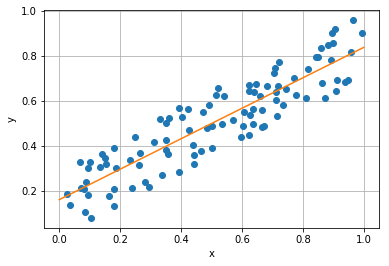

Correlation
0.9023599067343198


In [20]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

xm= x.mean()
ym = y.mean()

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

print("Correlation")
print(np.sum((x - xm) * (y - ym))/ (((np.sum((x - xm)**2)) * (np.sum((y - ym)**2)))**0.5))